<a href="https://colab.research.google.com/github/DeepthiManthapuram/PolynomialRegression/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style='whitegrid')

#mount your drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Position_Salaries.csv'

df = pd.read_csv(path)
print(df.head)
df.dtypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<bound method NDFrame.head of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>


,0
Position,object
Level,int64
Salary,int64


In [5]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df.dtypes

,0
Position,object
Level,int64
Salary,int64


In [6]:
categorical_col = ['Position']
for i in categorical_col:
  df[i] = lb.fit_transform(df[i])

In [7]:
cont = ['Level','Salary']
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df[cont] = st.fit_transform(df[cont])

In [10]:
x = df.drop('Salary',axis = 1)
y = df.Salary

In [11]:
print(x.shape)
print(y.shape)

(10, 2)
(10,)


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [13]:
print("x train shape : ",x_train.shape)
print("y train shape : ",y_train.shape)
print("x test shape : ",x_test.shape)
print("y test shape : ",y_test.shape)

x train shape :  (7, 2)
y train shape :  (7,)
x test shape :  (3, 2)
y test shape :  (3,)


In [32]:
model.coef_

array([-0.03822952,  0.6289821 ])

In [18]:
model.intercept_

np.float64(-0.07078769582195014)

In [27]:
X = df[['Level']]
y = df[['Salary']]

In [28]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [29]:
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

print("✅ Models Trained Successfully!")


✅ Models Trained Successfully!


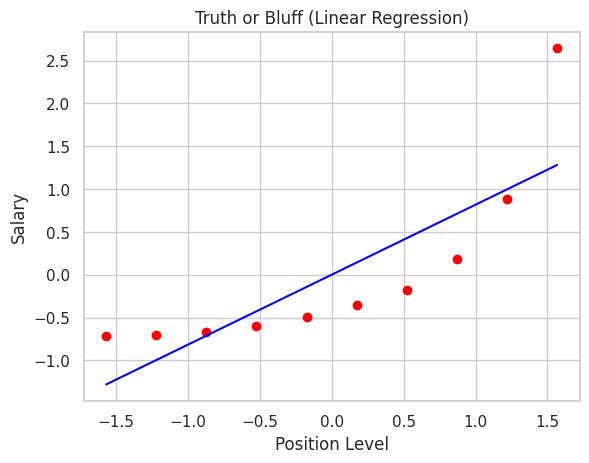

In [30]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

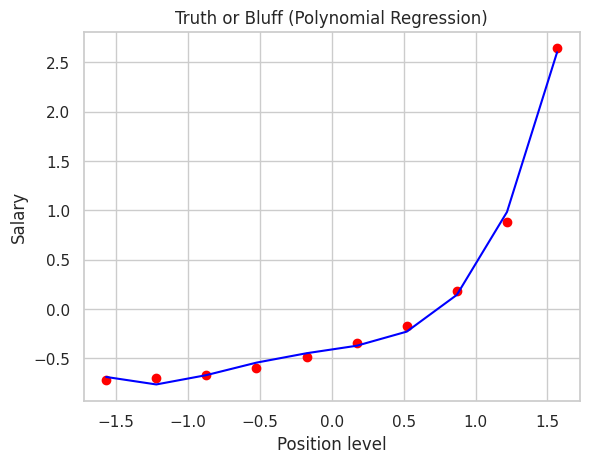

In [31]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [ ]:
import

In [38]:
import numpy as np
from sklearn.metrics import root_mean_squared_error,mean_squared_error, mean_absolute_error, r2_score

# Polynomial predictions
y_poly_pred = lin_reg_2.predict(poly_reg.transform(X))

# Metrics
mse = mean_squared_error(y, y_poly_pred)
mae = mean_absolute_error(y, y_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_poly_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)



Mean Squared Error (MSE): 0.0026077108293386607
Mean Absolute Error (MAE): 0.044652559351957645
Root Mean Squared Error (RMSE): 0.05106575006145176
R² Score: 0.9973922891706614


In [39]:
#linear
y_pred2=lin_reg.predict(X)
mse=mean_squared_error(y,y_pred2)
mae=mean_absolute_error(y,y_pred2)
r2=r2_score(y,y_pred2)
rmse=root_mean_squared_error(y,y_pred2)
#print
print("MSE:",mse)
print("MAE:",mae)
print("R2:",r2)
print("RMSE:",rmse)

MSE: 0.3309587668070105
MAE: 0.452287214081119
R2: 0.6690412331929894
RMSE: 0.5752901587955511
